Is consumer behavior linked to consumer purchasing intention?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

data = pd.read_csv("online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
Month_Rev = data[['Month','Revenue']]
#Feb to Nov

#Need to add up all True in each month
months = ['Feb','Mar','May','June','Jul','Aug','Sep','Oct','Nov','Dec']
months_count =[] #number of samples in each month
months_rev = [] # number of TRUE rev 
months_percent_rev = [] #percent of people who actually bought something 
months_percent_no_rev = []
feb_rev = 0
mar_rev = 0
#apr_rev = 0
may_rev = 0
june_rev = 0
jul_rev = 0
aug_rev = 0
sep_rev = 0
oct_rev = 0
nov_rev = 0
dec_rev = 0

#print(Month_Rev['Month'][1200]) #exact month at index 1200


for i in range(len(months)):
    sample_count = 0
    rev_count = 0
    for j in range(len(Month_Rev)):
        if Month_Rev['Month'][j] == months[i]:
            sample_count += 1
            if Month_Rev['Revenue'][j] == True:
                rev_count += 1
                
    months_count.append(sample_count)
    months_rev.append(rev_count)


#percent of sales made in each month

for k in range(len(months_count)):
    
    temp_percent = (months_rev[k]/months_count[k]) * 100
    months_percent_rev.append(temp_percent)

#filling in months_percent_no_rev
for l in range(len(months_percent_rev)):
    temp_no_rev = 100 - months_percent_rev[l]
    months_percent_no_rev.append(temp_no_rev)



[1.6304347826086956, 10.068169900367069, 10.850178359096315, 10.069444444444445, 15.277777777777779, 17.551963048498845, 19.196428571428573, 20.9471766848816, 25.350233488992664, 12.507237984944991]


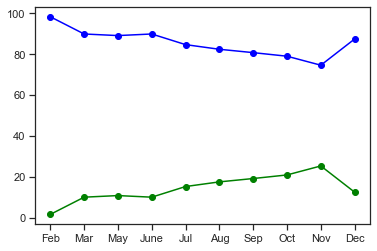

In [3]:
#PLOT PERCENT SALES OVER MONTHS
import matplotlib.pyplot as plt

X = months
y = months_percent_rev
yy = months_percent_no_rev

plt.plot(X, y, '-ok', color='green')
plt.plot(X, yy, '-ok', color='blue')
print(months_percent_rev)

In [4]:
admin = data['Administrative']
admin_dur = data['Administrative_Duration']

info = data['Informational']
info_dur = data['Informational_Duration']

product = data['ProductRelated']
product_dur = data['ProductRelated_Duration']

revenue = data['Revenue']


avg_product_dur = []
avg_info_dur = []
avg_admin_dur = []

for i in range(len(product)):
    if product[i] and info[i] and admin[i] != 0:
        temp_avg_prod = product_dur[i]/product[i]
        temp_avg_info = info_dur[i]/info[i]
        temp_avg_admin = admin_dur[i]/admin[i]
        avg_product_dur.append(temp_avg_prod/60)
        avg_info_dur.append((round(temp_avg_info/60)))
        avg_admin_dur.append(temp_avg_admin/60)
    else:
        avg_product_dur.append(0)
        avg_info_dur.append(0)
        avg_admin_dur.append(0)
        
#average time spent on each page type which resulted in user purchasing PER USER
avg_product_dur_rev = [] 
avg_info_dur_rev    = [] 
avg_admin_dur_rev   = [] 

avg_product_dur_noRev = []
avg_info_dur_noRev = []
avg_admin_dur_noRev = []

#sum of all avg times spent on each page type to find out overall average time spent on each page w/ rev
sum_prod_pg_RV  = 0.0 #RV = returning visitor
sum_info_pg_RV = 0.0
sum_admin_pg_RV = 0.0

sum_prod_pg_NV = 0.0 #NV = new visitor
sum_info_pg_NV = 0.0
sum_admin_pg_NV = 0.0

total_prod_time_rev = 0.0
total_info_time_rev = 0.0
total_admin_time_rev = 0.0

total_prod_time_noRev = 0.0
total_info_time_noRev = 0.0
total_admin_time_noRev = 0.0

#separating avgerage product duration into Rev/No Rev
for j in range(len(avg_product_dur)):
    if revenue[j] == True: 
        avg_product_dur_rev.append(avg_product_dur[j])
        avg_info_dur_rev.append(avg_info_dur[j])
        avg_admin_dur_rev.append(avg_admin_dur[j]) 
    
    elif revenue[j] == False:
        avg_product_dur_noRev.append(avg_product_dur[j])
        avg_info_dur_noRev.append(avg_info_dur[j])
        avg_admin_dur_noRev.append(avg_admin_dur[j])
        

        
#In total, what was the average amount of time spent on each page?

##REV
for k in avg_product_dur_rev:
    total_prod_time_rev += k
for l in avg_info_dur_rev:
    total_info_time_rev += l
for m in avg_admin_dur_rev:
    total_admin_time_rev += m
    
for n in avg_product_dur_noRev:
    total_prod_time_noRev += n
for o in avg_info_dur_noRev:
    total_info_time_noRev += o
for p in avg_admin_dur_noRev:
    total_admin_time_noRev += p

avg_prod_time_rev = total_prod_time_rev/len(avg_product_dur_rev)
avg_info_time_rev = total_info_time_rev/len(avg_info_dur_rev)
avg_admin_time_rev = total_admin_time_rev/len(avg_admin_dur_rev)

avg_prod_time_noRev = total_prod_time_noRev/len(avg_product_dur_noRev)
avg_info_time_noRev = total_info_time_noRev/len(avg_info_dur_noRev)
avg_admin_time_noRev = total_admin_time_noRev/len(avg_admin_dur_noRev)
#create df of average time (min) spent on each page w/ revenue col
avg_page_time_df = pd.DataFrame(columns=['Avg Prod Dur', 'Avg Info Dur', 'Avg Admin Dur','Rev','Vis Type'])
avg_page_time_df['Avg Prod Dur'] = avg_product_dur_rev
avg_page_time_df['Avg Info Dur'] = avg_info_dur_rev
avg_page_time_df['Avg Admin Dur'] = avg_admin_dur_rev
avg_page_time_df['Rev'] = revenue
avg_page_time_df['Vis Type'] = data['VisitorType'] #Returning_Visitor,New_Visitor





rev_avg_time = [avg_prod_time_rev*60,avg_info_time_rev*60,avg_admin_time_rev*60]
noRev_avg_time = [avg_prod_time_noRev*60,avg_info_time_noRev*60,avg_admin_time_noRev*60]


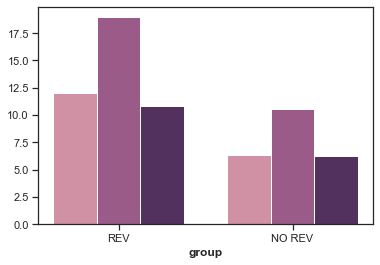

[12.007114788861982, 6.371277635907699] [18.962264150943394, 10.51237766263673] [10.844136333565727, 6.261849721982869]


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
 
# set height of bar
#bars1 = [12, 30, 1, 8, 22]
#bars2 = [28, 6, 16, 5, 10]
#bars3 = [29, 3, 24, 25, 17]

bars1 = [rev_avg_time[0],noRev_avg_time[0]]
bars2 = [rev_avg_time[1],noRev_avg_time[1]]
bars3 = [rev_avg_time[2],noRev_avg_time[2]]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#cf91a3', width=barWidth, edgecolor='white', label='var1') #forrestgreen
plt.bar(r2, bars2, color='#9a5b88', width=barWidth, edgecolor='white', label='var2')  #dark green
plt.bar(r3, bars3, color='#52315f', width=barWidth, edgecolor='white', label='var3')  #lime green
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['REV', 'NO REV'])
 
# Create legend & Show graphic
#plt.legend()
plt.show()

print(bars1,bars2,bars3)

In [19]:
#color palette
pal = sns.color_palette(sns.color_palette("Paired")
                       )
pal.as_hex()

['#a6cee3',
 '#1f78b4',
 '#b2df8a',
 '#33a02c',
 '#fb9a99',
 '#e31a1c',
 '#fdbf6f',
 '#ff7f00',
 '#cab2d6',
 '#6a3d9a',
 '#ffff99',
 '#b15928']

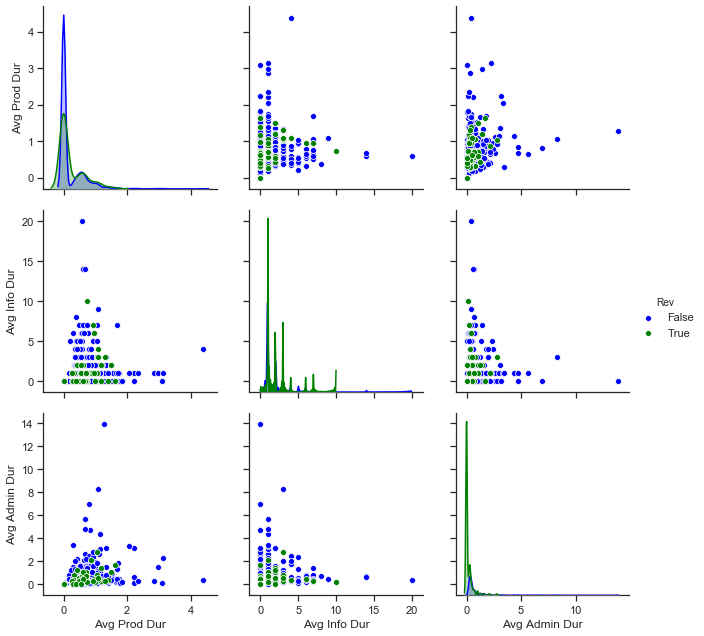

In [7]:
# Scatter Plot with Hue for visualizing data in 3-D - NOT USING THIS, NO COMPLEX TO READ QUICKLY


g = sns.pairplot(avg_page_time_df,vars = ["Avg Prod Dur","Avg Info Dur","Avg Admin Dur"], hue= "Rev",
                 palette={True: "green", False: "blue"},height=3)


In [29]:
#percent of returing visitors w/ rev
Vis = data['VisitorType']
Rev = data['Revenue']

RVis_Rev_total = 0  #RVis = returning visitor
RVis_noRev_total = 0
NVis_Rev_total = 0 #Nvis = New visitor
NVis_noRev_total = 0
Other_Rev_total = 0
Other_noRev_total = 0



for i in range(len(Vis)):
    if Vis[i] == "Returning_Visitor" and Rev[i] == True:
        RVis_Rev_total += 1
       
    elif Vis[i] == "Returning_Visitor" and Rev[i] == False:
        RVis_noRev_total += 1
        
    elif Vis[i] == "New_Visitor" and Rev[i] == True:
        NVis_Rev_total += 1
      
    elif Vis[i] == "New_Visitor" and Rev[i] == False:
        NVis_noRev_total += 1
    elif Vis[i] == "Other" and Rev[i] == True:
        Other_Rev_total += 1
       
    elif Vis[i] == "Other" and Rev[i] == False:
        Other_noRev_total += 1
    
'''






'''


R_total_per_users = RVis_Rev_total + RVis_noRev_total
N_total_per_users = NVis_Rev_total + NVis_noRev_total
O_total_per_users = Other_Rev_total + Other_noRev_total

R_total_per = ((RVis_Rev_total + RVis_noRev_total)/12330)*100
N_total_per = ((NVis_Rev_total + NVis_noRev_total)/12330)*100
O_total_per = ((Other_Rev_total + Other_noRev_total)/12330)*100
print("Return percentage:", R_total_per)
print("New percentage:", N_total_per)
print("Other percentage:", O_total_per)
print('\n')

#Rev percentages
R_per_rev = RVis_Rev_total/(RVis_Rev_total + RVis_noRev_total)*100
N_per_rev = NVis_Rev_total/(NVis_Rev_total + NVis_noRev_total)*100
O_per_rev = Other_Rev_total/(Other_Rev_total+Other_noRev_total)*100
print("Return Rev:", R_per_rev)
print("New Rev:", N_per_rev)
print("Other Rev:", O_per_rev)
print('\n')

#No Rev percentages
R_per = RVis_noRev_total/(RVis_Rev_total + RVis_noRev_total)*100
N_per = NVis_noRev_total/(NVis_Rev_total + NVis_noRev_total)*100
O_per = Other_noRev_total/(Other_Rev_total+Other_noRev_total)*100

print("Return NO Rev:", R_per)
print("New No Rev:", N_per)
print("Other NO Rev:", O_per)


Return percentage: 85.57177615571776
New percentage: 13.738848337388484
Other percentage: 0.689375506893755


Return Rev: 13.93232868922377
New Rev: 24.911452184179456
Other Rev: 18.823529411764707


Return NO Rev: 86.06767131077623
New No Rev: 75.08854781582053
Other NO Rev: 81.17647058823529


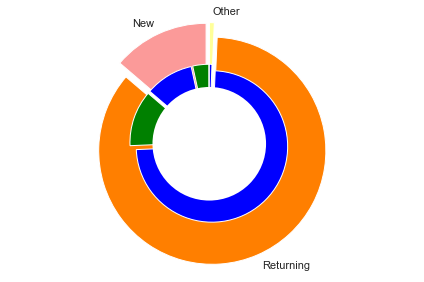

In [25]:
#cool nested pie chart
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['New', 'Returning', 'Other']
sizes = [N_total_per_users, R_total_per_users, O_total_per_users]
labels_gender = ['Rev','No Rev','Rev','No Rev','Rev','No Rev']
sizes_gender = [NVis_Rev_total,NVis_noRev_total,RVis_Rev_total,RVis_noRev_total,Other_Rev_total,
                Other_noRev_total]
colors = ['#fb9a99', '#ff7f00', '#ffff99']
colors_gender = ['green','blue', 'green','blue', 'green','blue']
explode = (0.2,0.2,0.2) 
explode_gender = (0.1,0.1,0.1,0.1,0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=3)
plt.pie(sizes_gender,colors=colors_gender,startangle=90,explode=explode_gender,radius=2 )
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

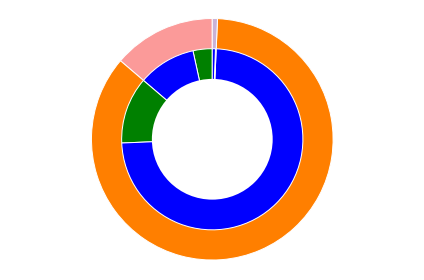

In [23]:
# Data to plot

# Plot
plt.pie(sizes, colors=colors, startangle=90,frame=True)
plt.pie(sizes_gender,colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()